# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets

In [2]:
path = '../data/absences.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

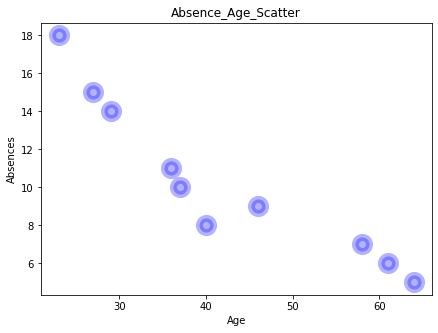

In [5]:
fig1, ax1 = plt.subplots(figsize = (7,5))
ax1.scatter(data['Age'],data['Absences'], linewidth=7.0, c='b', alpha=0.3, s=200) 

# Title/y-x axis name
plt.gca().set(title='Absence_Age_Scatter', ylabel='Absences', xlabel='Age')

plt.show()

In [6]:
# It seems to have a high negative correlation.

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [7]:
def slope_interc(x, y):
    # Slope
    slope = ( np.mean(x*y) - ( np.mean(x) * np.mean(y) ) ) / ( np.mean( np.power(x, 2) ) - np.power( np.mean(x), 2) )
    # Intercept
    interc = np.mean(y) - ( np.mean(x) * slope )
    return slope, interc

In [8]:
slope, intercept = slope_interc(x =data['Age'], y=data['Absences'])


print("The slope is: {:.2f}".format(slope))
print("The intercerpt is: {:.2f}".format(intercept))

The slope is: -0.27
The intercerpt is: 21.59


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

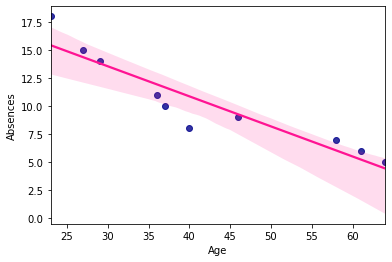

In [9]:
#SNS
sns.regplot(x='Age',y='Absences', data=data, scatter_kws={"color": "darkblue"}, line_kws={"color": "deeppink"})
plt.show()

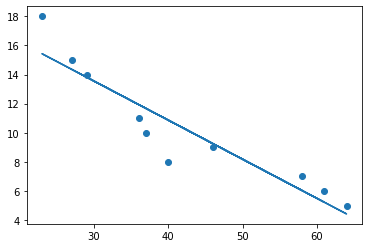

In [10]:
#Manual
plt.plot(data['Age'], data['Age']*slope + intercept )
plt.scatter(data['Age'],data['Absences'] )
plt.show()

In [11]:
# With this line you can clearly see the high negative correlation. 
# It also let's you predict possible absence days for certain ages.

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [29]:
def cov_corr(x,y):
    n= len(x)
    cov = (sum((x - np.mean(x)) * (y - np.mean(y)) ))/(n-1)
    corr = (sum((x - np.mean(x)) *(y - np.mean(y)) ) )/ (np.sqrt(sum((x-np.mean(x))**2)*sum((y - np.mean(y))**2)))
    return cov, corr

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [32]:
cov, corr = cov_corr(x =data['Age'], y=data['Absences'])

print("The covariance is: {:f}".format(cov))
print("The correlation is: {:f}".format(corr))

The covariance is: -57.700000
The correlation is: -0.932543


In [ ]:
'''
A covariance value of zero indicates that both variables are completely independent 
as the value is -57 it seems like the 2 variables are negatively dependent.

Positive Correlation: both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.
>> Negative Correlation: variables change in opposite directions.
''' 

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# The tests confirm that we are having a high negative correlation which means the higher the ag, the lower the absence days.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [33]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [35]:
cov2, corr2 = cov_corr(x =ironbeers_df['X'], y=ironbeers_df['Y'])
print("The covariance is: {:f}".format(cov2))
print("The correlation is: {:f}".format(corr2))

The covariance is: 12.000000
The correlation is: 0.977008


In [ ]:
# as the covariance value is -12 it seems like the 2 variables are positively dependent.
# Positive Correlation: both variables change in the same direction.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

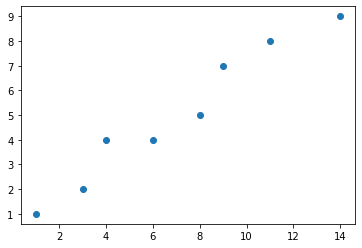

In [36]:
plt.scatter(ironbeers_df['X'],ironbeers_df['Y'] )
plt.show()

In [ ]:
# they seem to have a high positive correlation

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [37]:
slope2, intercept2 = slope_interc(x =ironbeers_df['X'], y=ironbeers_df['Y'] )

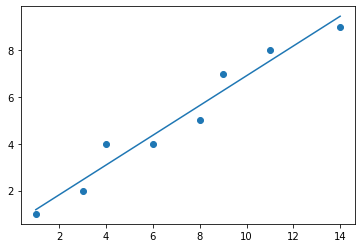

In [39]:
plt.plot(ironbeers_df['X'], ironbeers_df['X']*slope2 + intercept2 )
plt.scatter(ironbeers_df['X'],ironbeers_df['Y'] )
plt.show()

In [ ]:
# With this line you can clearly see the high positive correlation. 

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# No, the more people I tell to stay, the more actually stay. Guess it's the weekend calling ^^

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here